In [14]:
import numpy as np

from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.visualise_layouts_and_metrics.plot import show_layout,show_generation_metrics
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from experiments.utils.get_avg_classwise_f1 import get_avg_classwise_f1
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
from scipy import stats
import matplotlib.pyplot as plt
from experiments.utils.smooth_running_mean import smooth_running_mean

In [8]:
output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/sned_vs_96/out/"))).resolve().absolute()

path_to_pickle = (Path(output_dir).joinpath(Path(f"rna_layouts.pickle"))).resolve()
with open(path_to_pickle, 'rb') as file:
    rna_layouts = pickle.load(file)
print(rna_layouts)

[<hdimvis.create_low_d_layout.SNeDLayout.SNeDLayout object at 0x0000017D31400B20>, <hdimvis.create_low_d_layout.Chalmers96Layout.Chalmers96Layout object at 0x0000017D31CD7010>]


len 31
stop 30
start 1
len 3001
stop 3000
start 100


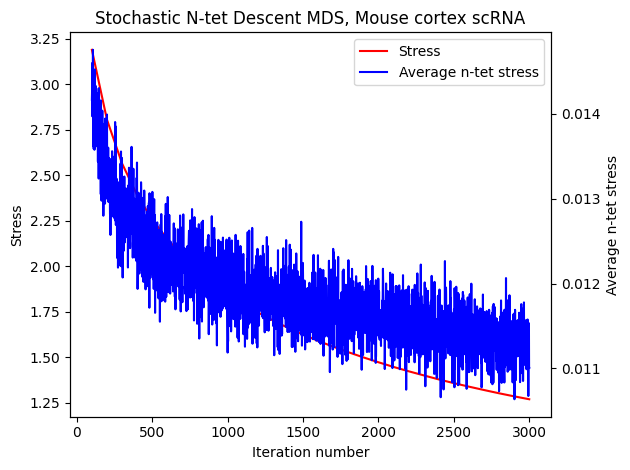

len 31
stop 30
start 1
len 3001
stop 3000
start 100


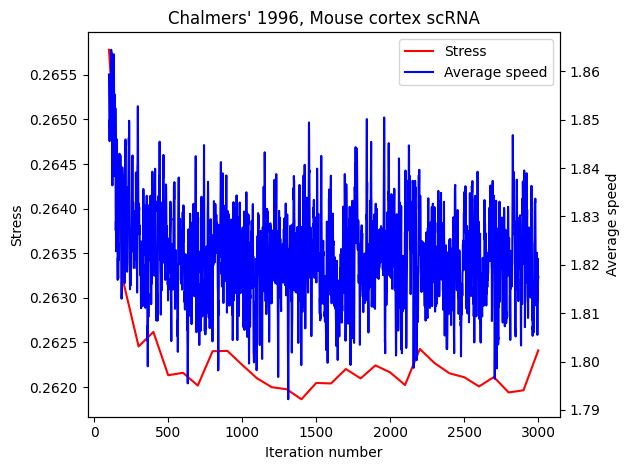

In [13]:
show_generation_metrics(rna_layouts[0], iters_from=100, quartet_stress=True, title=f"{rna_layouts[0].algorithm.name}, Mouse cortex scRNA")

show_generation_metrics(rna_layouts[1], iters_from=100, average_speed=True, title=f"{rna_layouts[1].algorithm.name}, Mouse cortex scRNA")


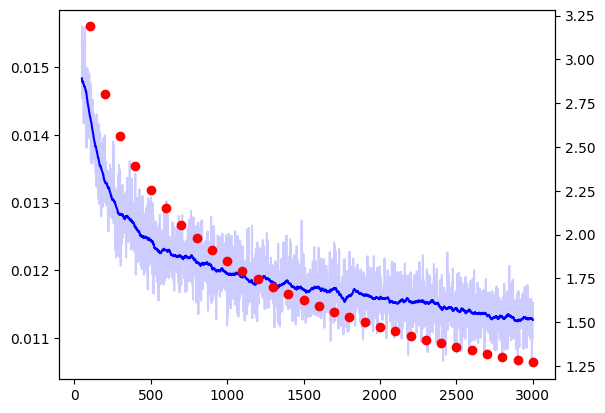

In [32]:
fig, ax = plt.subplots()

x_n_tet_stress = rna_layouts[0].collected_metrics['Average n-tet stress'][0][50:]
y_ntet = rna_layouts[0].collected_metrics['Average n-tet stress'][1][50:]
y_ntet_smooth = smooth_running_mean(y_ntet, 60 )
ax.plot(x_n_tet_stress, y_ntet, c='b', alpha=0.2)
ax.plot(x_n_tet_stress, y_ntet_smooth, c='b')

ax2  = ax.twinx()
x_stress = rna_layouts[0].collected_metrics['Stress'][0][1:]
y_stress = rna_layouts[0].collected_metrics['Stress'][1][1:]
ax2.scatter(x_stress, y_stress, c='r')
plt.show()


####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 4
####################
"Average n-tet stress" will be measured on every iteration
####################
"Stress" will be measured every 500 iterations
####################
All stress calculations will be performed using the euclidian norm
####################

 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 

len 8
stop 7
start 0


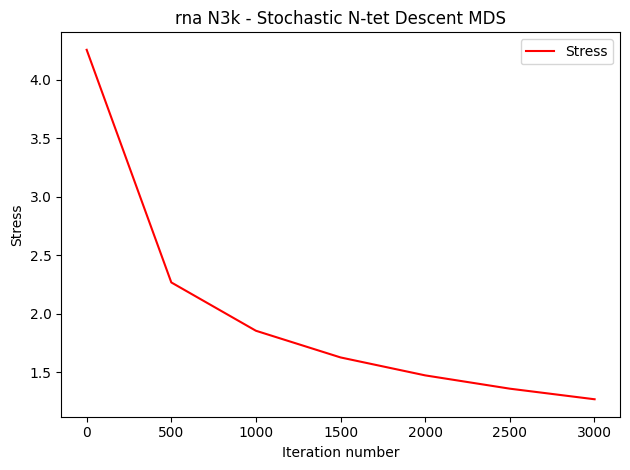

In [33]:
dataset = DataFetcher.fetch_data('rna N3k')
metric_collection_squad = {"Average n-tet stress": 1, "Stress": 500}
Xld = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
Xld *= 10/np.std(Xld)
squad = SNeD(dataset=dataset, initial_layout=Xld, use_nesterovs_momentum=False, ntet_size=4, momentum=0.1)
layout_squad = LayoutCreation.create_layout(squad, no_iters=6000,optional_metric_collection=metric_collection_squad)
show_generation_metrics(layout_squad)